# Examen del 2do Parcial

1. Utilizando el dataset de _Coactivation_matrix.mat_:

In [1]:
import scipy.io
file_path="C:/Users/nicol/OneDrive/Documentos/GitHub/Neurociencias-2026-1/S03_datasets/BCT/Coactivation_matrix.mat"
file_dict = scipy.io.loadmat(file_path)
file_dict

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Dec 25 01:14:03 2013',
 '__version__': '1.0',
 '__globals__': [],
 'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]], shape=(638, 638)),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.

Tamaño de la matriz: (638, 638)


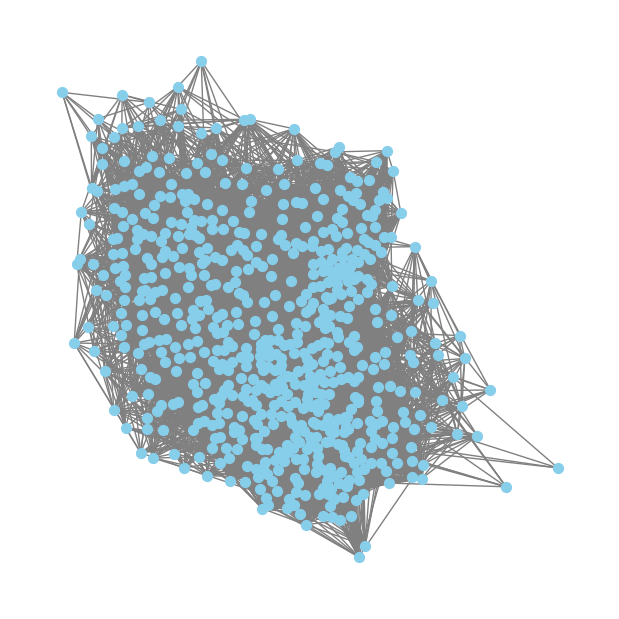

Grafo con 638 nodos y 18625 aristas


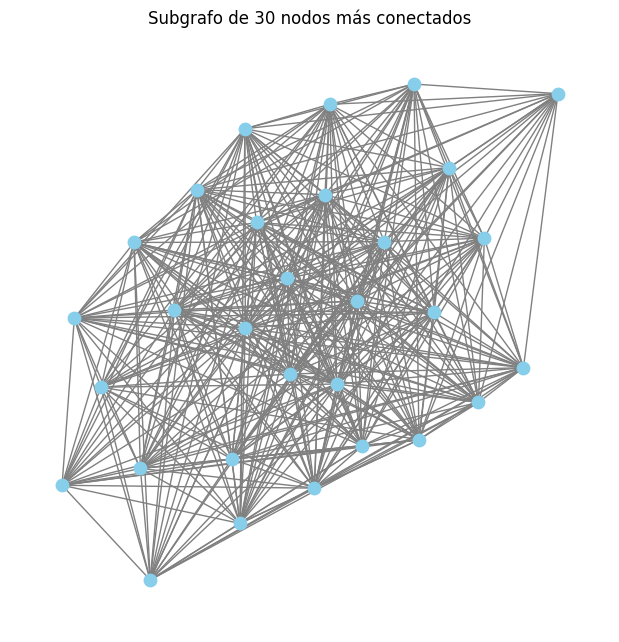

Clustering promedio: 0.384
Longitud de camino promedio: 2.215

Coeficiente de mundo pequeño (σ): 2.477
C_rand=0.139, L_rand=1.977


In [2]:
#CALCULE EL COEFICIENTE DE MUNDO PEQUEÑO
file_dict.keys()
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import networkx as nx

A = file_dict['Coactivation_matrix']
print("Tamaño de la matriz:", A.shape)
G = nx.from_numpy_array(A)
plt.figure(figsize=(6,6))
nx.draw(G, node_size=50, node_color='skyblue', edge_color='gray')
plt.show()
print(f"Grafo con {G.number_of_nodes()} nodos y {G.number_of_edges()} aristas")
nx.is_connected(G)
#subgrafo representativo 
degrees = dict(G.degree())
top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:30]  # 30 nodos más conectados
H = G.subgraph(top_nodes)

plt.figure(figsize=(6,6))
nx.draw(H, node_size=80, node_color='skyblue', edge_color='gray', with_labels=False)
plt.title("Subgrafo de 30 nodos más conectados")
plt.show()
# Clustering y longitud de camino promedio 
C = nx.average_clustering(G)
L = nx.average_shortest_path_length(G)
print(f"Clustering promedio: {C:.3f}")
print(f"Longitud de camino promedio: {L:.3f}")
#Redes aleatorias de referencia
n_random = 10  
C_rand_list, L_rand_list = [], []

for i in range(n_random):
    # Red aleatoria con misma secuencia de grados
    G_rand = nx.configuration_model([d for _, d in G.degree()])
    G_rand = nx.Graph(G_rand)  # convertir a simple graph
    G_rand.remove_edges_from(nx.selfloop_edges(G_rand))
    
    C_rand_list.append(nx.average_clustering(G_rand))
    largest_cc_rand = max(nx.connected_components(G_rand), key=len)
    Gc_rand = G_rand.subgraph(largest_cc_rand)
    L_rand_list.append(nx.average_shortest_path_length(Gc_rand))
C_rand = np.mean(C_rand_list)
L_rand = np.mean(L_rand_list)

#Coeficiente de mundo pequeño σ 
sigma = (C / C_rand) / (L / L_rand)
print(f"\nCoeficiente de mundo pequeño (σ): {sigma:.3f}")
print(f"C_rand={C_rand:.3f}, L_rand={L_rand:.3f}")

Número de comunidades detectadas: 5


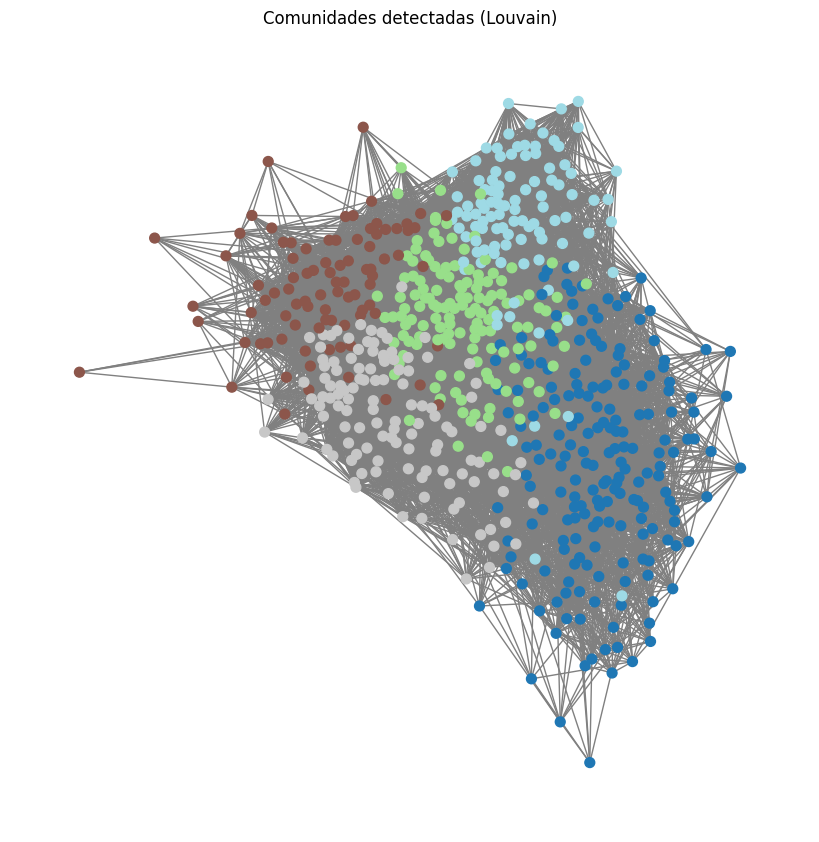

In [3]:
#CALCULE LAS COMUNIDADES DEL GRAFO
import community as community_louvain 

# Calcular partición usando Louvain
partition = community_louvain.best_partition(G)  # Diccionario {nodo: comunidad}

# Número de comunidades
num_comunidades = len(set(partition.values()))
print(f"Número de comunidades detectadas: {num_comunidades}")

# Asignar colores a nodos según comunidad
colors = [partition[node] for node in G.nodes()]

plt.figure(figsize=(8,8))
nx.draw(G, node_size=50, node_color=colors, cmap=plt.cm.tab20, edge_color='gray', with_labels=False)
plt.title("Comunidades detectadas (Louvain)")
plt.show()

Top 10 hubs por grado:
Nodo 330: grado 179
Nodo 482: grado 172
Nodo 230: grado 164
Nodo 416: grado 163
Nodo 485: grado 161
Nodo 235: grado 160
Nodo 356: grado 153
Nodo 494: grado 152
Nodo 350: grado 151
Nodo 400: grado 151

Top 10 hubs por betweenness centrality:
Nodo 330: betweenness 0.0098
Nodo 621: betweenness 0.0092
Nodo 546: betweenness 0.0085
Nodo 339: betweenness 0.0081
Nodo 629: betweenness 0.0079
Nodo 482: betweenness 0.0078
Nodo 230: betweenness 0.0077
Nodo 235: betweenness 0.0074
Nodo 50: betweenness 0.0074
Nodo 416: betweenness 0.0073

Top 10 hubs por closeness centrality:
Nodo 230: closeness 0.5435
Nodo 416: closeness 0.5426
Nodo 235: closeness 0.5407
Nodo 482: closeness 0.5407
Nodo 629: closeness 0.5407
Nodo 330: closeness 0.5398
Nodo 485: closeness 0.5389
Nodo 38: closeness 0.5317
Nodo 491: closeness 0.5304
Nodo 328: closeness 0.5286


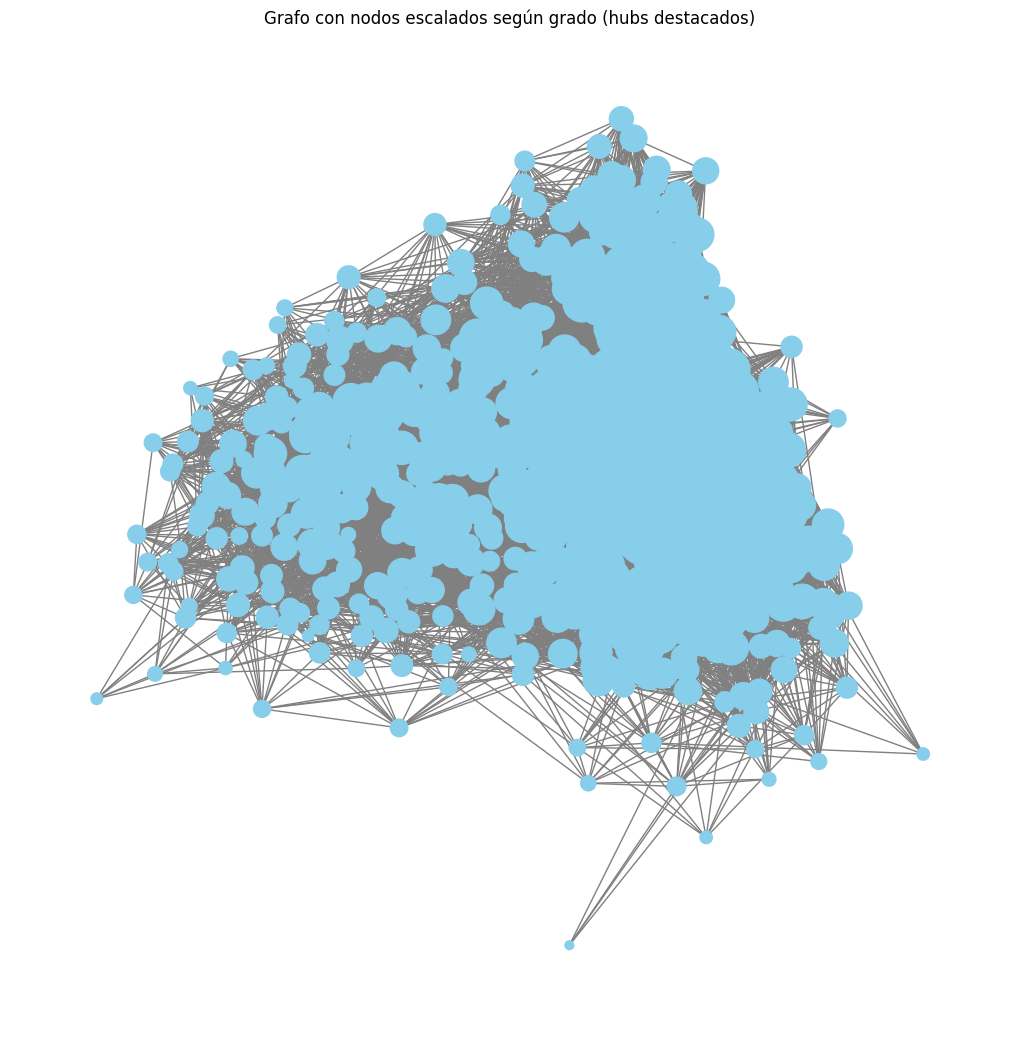

In [15]:
#CALCULE LOS HUBS

#métricas de centralidad 

#Degree (número de conexiones)
grado = dict(G.degree())
hubs_grado = sorted(grado.items(), key=lambda x: x[1], reverse=True)

#Betweenness centrality
bet_centrality = nx.betweenness_centrality(G)
hubs_bet = sorted(bet_centrality.items(), key=lambda x: x[1], reverse=True)

#Closeness centrality
closeness = nx.closeness_centrality(G)
hubs_close = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

# top 10 hubs por cada métrica 
print("Top 10 hubs por grado:")
for nodo, val in hubs_grado[:10]:
    print(f"Nodo {nodo}: grado {val}")

print("\nTop 10 hubs por betweenness centrality:")
for nodo, val in hubs_bet[:10]:
    print(f"Nodo {nodo}: betweenness {val:.4f}")

print("\nTop 10 hubs por closeness centrality:")
for nodo, val in hubs_close[:10]:
    print(f"Nodo {nodo}: closeness {val:.4f}")


plt.figure(figsize=(10,10))
node_sizes = [grado[n]*10 for n in G.nodes()]  
nx.draw(G, node_color='skyblue', node_size=node_sizes, edge_color='gray', with_labels=False)
plt.title("Grafo con nodos escalados según grado (hubs destacados)")
plt.show()



In [5]:
#CALCULE LA EFICENCIA GLOBAL Y LOCAL
E_global = nx.global_efficiency(G)
print(f"Eficiencia global: {E_global:.4f}")
E_local = nx.local_efficiency(G)
print(f"Eficiencia local promedio: {E_local:.4f}")

Eficiencia global: 0.4949
Eficiencia local promedio: 0.6644


Nodo 0: grado = 32
Nodo 1: grado = 26
Nodo 2: grado = 38
Nodo 3: grado = 37
Nodo 4: grado = 29
Nodo 5: grado = 58
Nodo 6: grado = 88
Nodo 7: grado = 124
Nodo 8: grado = 29
Nodo 9: grado = 57
Nodo 10: grado = 54
Nodo 11: grado = 59
Nodo 12: grado = 44
Nodo 13: grado = 49
Nodo 14: grado = 50
Nodo 15: grado = 36
Nodo 16: grado = 124
Nodo 17: grado = 49
Nodo 18: grado = 86
Nodo 19: grado = 109
Nodo 20: grado = 73
Nodo 21: grado = 37
Nodo 22: grado = 62
Nodo 23: grado = 47
Nodo 24: grado = 31
Nodo 25: grado = 54
Nodo 26: grado = 20
Nodo 27: grado = 35
Nodo 28: grado = 27
Nodo 29: grado = 40
Nodo 30: grado = 30
Nodo 31: grado = 42
Nodo 32: grado = 31
Nodo 33: grado = 37
Nodo 34: grado = 29
Nodo 35: grado = 56
Nodo 36: grado = 49
Nodo 37: grado = 108
Nodo 38: grado = 149
Nodo 39: grado = 73
Nodo 40: grado = 78
Nodo 41: grado = 114
Nodo 42: grado = 120
Nodo 43: grado = 123
Nodo 44: grado = 126
Nodo 45: grado = 76
Nodo 46: grado = 90
Nodo 47: grado = 43
Nodo 48: grado = 51
Nodo 49: grado = 34
N

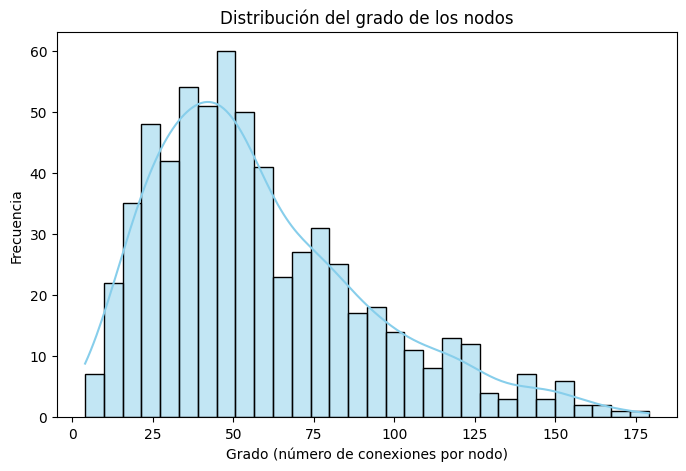

Grado promedio: 58.39
Grado máximo: 179
Grado mínimo: 4


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

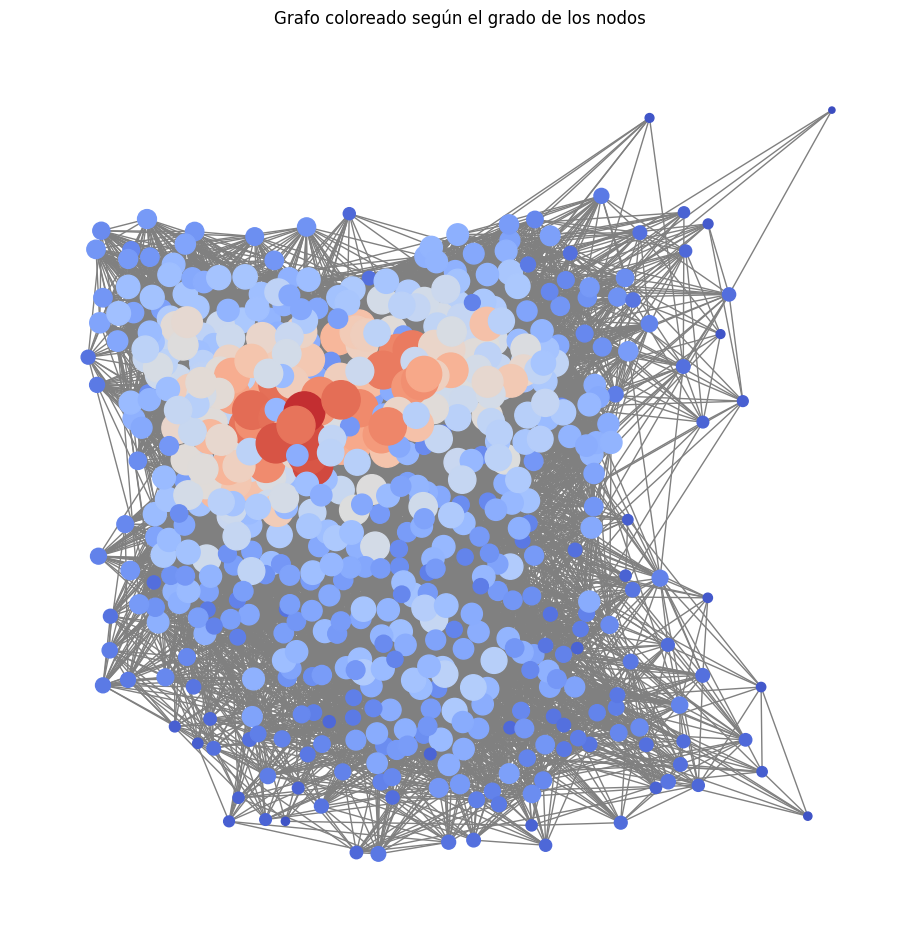

In [13]:
#DETERMINE EL GRADO DE CADA NODO
# Diccionario con el grado de cada nodo
grados = dict(G.degree())
# Mostrar los primeros 10 nodos con su grado
for nodo, val in list(grados.items())[:638]:
    print(f"Nodo {nodo}: grado = {val}")

import seaborn as sns
grados = dict(G.degree())
valores_grado = list(grados.values())

plt.figure(figsize=(8,5))
sns.histplot(valores_grado, bins=30, kde=True, color='skyblue')
plt.xlabel("Grado (número de conexiones por nodo)")
plt.ylabel("Frecuencia")
plt.title("Distribución del grado de los nodos")
plt.show()

print(f"Grado promedio: {np.mean(valores_grado):.2f}")
print(f"Grado máximo: {np.max(valores_grado)}")
print(f"Grado mínimo: {np.min(valores_grado)}")

plt.figure(figsize=(9,9))

# Colorear nodos según su grado
valores_grado = [grados[n] for n in G.nodes()]
nx.draw(
    G,
    node_color=valores_grado,
    cmap=plt.cm.coolwarm,   
    node_size=[v*5 for v in valores_grado],  # tamaño proporcional al grado
    edge_color='gray',
    with_labels=False
)
plt.title("Grafo coloreado según el grado de los nodos")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label='Grado')
plt.show()

2. Utilizando el dataset de _Coactivation_matrix.mat_:

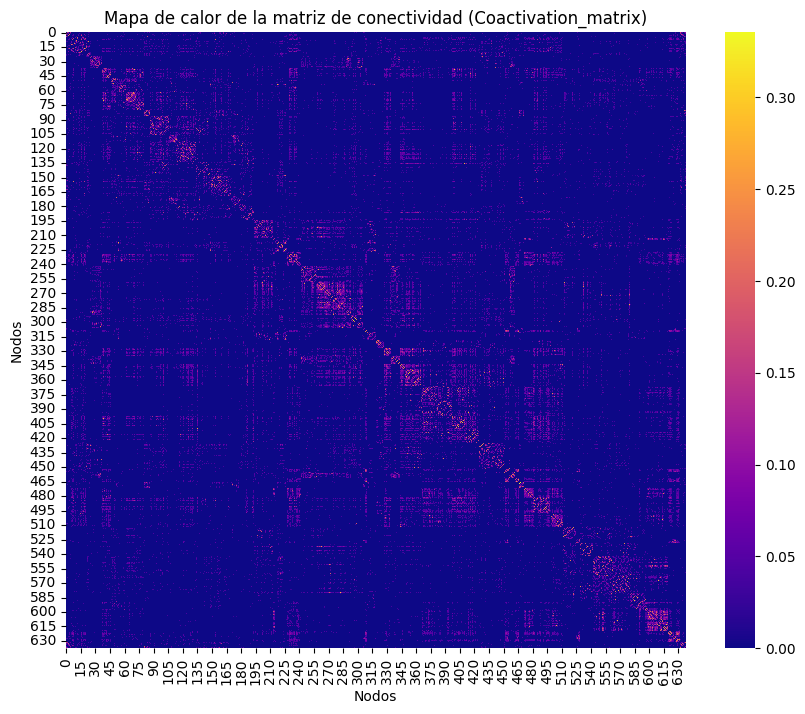

In [20]:
#GENERAR EL MAPA DE CALOR DE CADA MATRIZ DE CONECTIVIDAD
# Generar etiquetas genéricas
labels = [f"Nodo {i+1}" for i in range(A.shape[0])]

plt.figure(figsize=(10, 8))
sns.heatmap(A, cmap='plasma')
plt.title("Mapa de calor de la matriz de conectividad (Coactivation_matrix)")
plt.xlabel("Nodos")
plt.ylabel("Nodos")
plt.show()


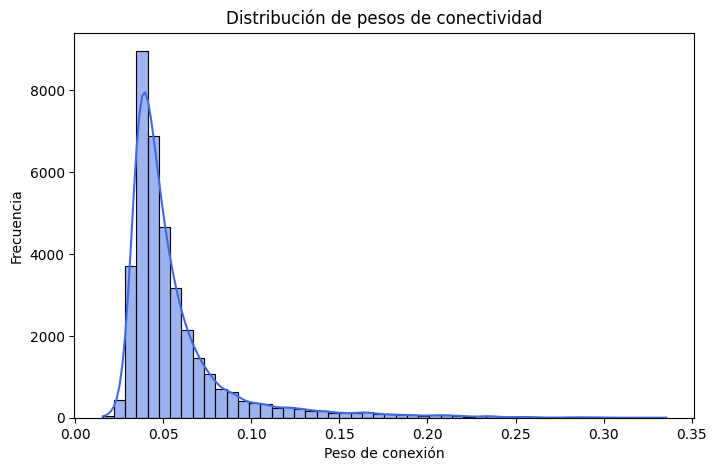

In [22]:
#GENERAR LA DISTRIBUCIÓN DE DATOS DE CADA MATRIZ DE CONECTIVIDAD

# Aplanar la matriz y eliminar ceros o la diagonal
valores = A.flatten()
valores = valores[valores != 0]  # quita conexiones ausentes
valores = valores[~np.isnan(valores)]  # por si hay NaN

plt.figure(figsize=(8,5))
sns.histplot(valores, bins=50, kde=True, color='royalblue')
plt.title("Distribución de pesos de conectividad")
plt.xlabel("Peso de conexión")
plt.ylabel("Frecuencia")
plt.show()


In [25]:
#¿Qué valor se encuentra en el percentil 0.25, 0.5 y 0.75 de la matriz de conectividad?

valores = A.flatten()
valores = valores[valores != 0]
valores = valores[~np.isnan(valores)]

# Calcular percentiles
p25 = np.percentile(valores, 25)
p50 = np.percentile(valores, 50)
p75 = np.percentile(valores, 75)

print(f"Percentil 25: {p25:.4f}")
print(f"Percentil 50 (mediana): {p50:.4f}")
print(f"Percentil 75: {p75:.4f}")

Percentil 25: 0.0383
Percentil 50 (mediana): 0.0461
Percentil 75: 0.0605


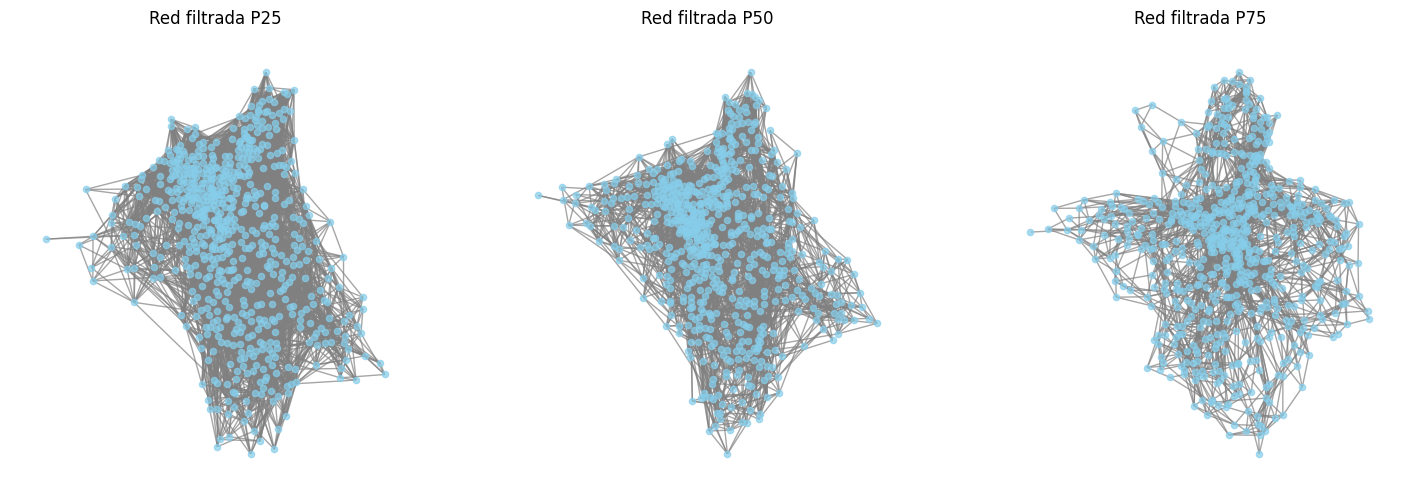

In [26]:
#Cree los 3 grafos 2D filtrando la matriz de conectividad con los valores dados por los percentiles del ejercicio anterior
#matrices filtradas
A_p25 = np.where(A >= p25, A, 0)
A_p50 = np.where(A >= p50, A, 0)
A_p75 = np.where(A >= p75, A, 0)

G_p25 = nx.from_numpy_array(A_p25)
G_p50 = nx.from_numpy_array(A_p50)
G_p75 = nx.from_numpy_array(A_p75)

graphs = [(G_p25, "Red filtrada P25"),
          (G_p50, "Red filtrada P50"),
          (G_p75, "Red filtrada P75")]

plt.figure(figsize=(18,6))

for i, (Gf, title) in enumerate(graphs):
    plt.subplot(1,3,i+1)
    pos = nx.spring_layout(Gf, seed=42)
    nx.draw(Gf, pos,
            node_size=20,
            node_color='skyblue',
            edge_color='gray',
            alpha=0.7,
            with_labels=False)
    plt.title(title)

plt.show()


3. Utilizando el dataset de _Coactivation_matrix.mat_:

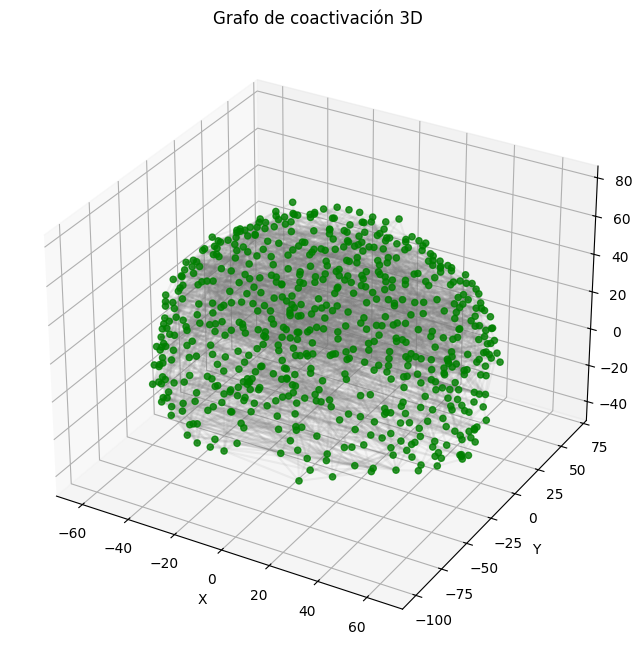

In [40]:
#GENERE EL GRAFO 3D
from mpl_toolkits.mplot3d import Axes3D
#Matriz de conectividad
A = file_dict['Coactivation_matrix']
# Crear grafo
G = nx.from_numpy_array(A)
# Coordenadas reales de cada nodo
Coord = file_dict['Coord']
x, y, z = Coord[:,0], Coord[:,1], Coord[:,2]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar nodos
ax.scatter(x, y, z, c='green', s=20, alpha=0.8)

# Dibujar algunas conexiones para no saturar la visualización
edges = np.array(list(G.edges()))
n_edges = len(edges)
max_edges = 2500  # mostrar solo 2500 aristas para no saturar el grafo
idx = np.random.choice(n_edges, min(n_edges, max_edges), replace=False)

for i, j in edges[idx]:
    ax.plot([x[i], x[j]], [y[i], y[j]], [z[i], z[j]], color='gray', alpha=0.1)

ax.set_title("Grafo de coactivación 3D")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

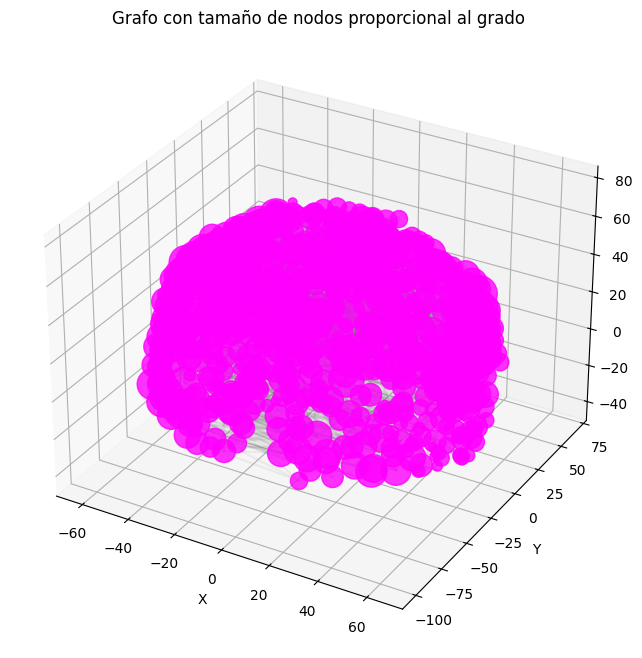

In [34]:
#Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
A = file_dict['Coactivation_matrix']
G = nx.from_numpy_array(A)
Coord = file_dict['Coord']
x, y, z = Coord[:,0], Coord[:,1], Coord[:,2]

# Calcular grado de cada nodo
grados = dict(G.degree())
# Escalar tamaños de nodos (multiplicar para que sean visibles)
node_size = [grados[i]*5 for i in range(len(G.nodes()))]  

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='magenta', s=node_size, alpha=0.8)

# Dibujar algunas conexiones
edges = np.array(list(G.edges()))
n_edges = len(edges)
max_edges = 2500
idx = np.random.choice(n_edges, min(n_edges, max_edges), replace=False)

for i, j in edges[idx]:
    ax.plot([x[i], x[j]], [y[i], y[j]], [z[i], z[j]], color='gray', alpha=0.1)

ax.set_title("Grafo con tamaño de nodos proporcional al grado")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

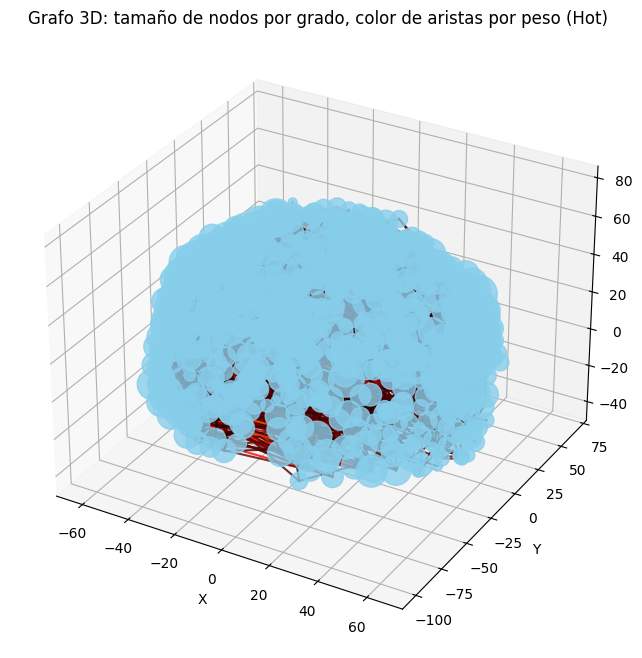

In [37]:
#Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot
from matplotlib import cm

A = file_dict['Coactivation_matrix']
G = nx.from_numpy_array(A)
Coord = file_dict['Coord']
x, y, z = Coord[:,0], Coord[:,1], Coord[:,2]

grados = dict(G.degree())
node_size = [grados[i]*5 for i in range(len(G.nodes()))]  

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='skyblue', s=node_size, alpha=0.8)

# Dibujar aristas coloreadas según el valor de la matriz
edges = np.array(list(G.edges()))
weights = np.array([A[i,j] for i,j in edges])

# Normalizar pesos para colormap
norm_weights = (weights - weights.min()) / (weights.max() - weights.min())
cmap = plt.get_cmap('hot')  


max_edges = 2000
idx = np.random.choice(len(edges), min(len(edges), max_edges), replace=False)

for k in idx:
    i, j = edges[k]
    ax.plot([x[i], x[j]], [y[i], y[j]], [z[i], z[j]], color=cmap(norm_weights[k]), alpha=0.8)

ax.set_title("Grafo 3D: tamaño de nodos por grado, color de aristas por peso (Hot)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()
